In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as snsmetrics 
from sklearn.metrics import classification_report

: 

In [2]:
np.random.seed(500)
Ct = pd.read_csv('data/comments_tag.csv',delimiter=',',encoding='latin-1')
Vps = pd.read_csv('data/videos+pop-stats.csv',usecols = [2,4],delimiter=',',encoding='latin-1')
Corpus = pd.merge(Ct, Vps, on = "Video ID")
Corpus.head()

,Video ID,Comment_tag,Keyword
0,-64r1hcxtV4,"['8:20-', '10:00', '.....', 'thought', 'happen...",mukbang
1,-6IgkG5yZfo,"['Hope', 'make', 'life', 'easier', '..', '00:4...",physics
2,-7hzaGya86g,"['Yes', 'Dinner', 'dancing', 'Lotte', 'Mart', ...",food
3,-8TnsjDRXUE,"['ha', 'sponsored', 'Onnit', 'Visit', 'http', ...",business
4,-9hjdvULDyc,"['Hope', 'everyone', 'get', 'perfect', '1600',...",sat


In [3]:
Corpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1817 entries, 0 to 1816
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Video ID     1817 non-null   object
 1   Comment_tag  1817 non-null   object
 2   Keyword      1817 non-null   object
dtypes: object(3)
memory usage: 56.8+ KB


In [43]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['Comment_tag'],Corpus['Keyword'],test_size=0.3)

In [44]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [46]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['Comment_tag'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)

{'20': 38, '10': 11, '00': 0, 'thought': 4410, 'happens': 2041, 'time': 4444, 'guy': 2011, 'health': 2072, 'anymore': 327, 'chosen': 832, 'path': 3189, 'hope': 2142, 'person': 3224, 'reading': 3566, 'continues': 1019, 'weight': 4788, 'loss': 2633, 'journey': 2403, 'got': 1942, 'fam': 1665, 'wa': 4742, 'getting': 1899, 'fat': 1680, 'eating': 1409, 'one': 3089, 'burger': 683, 'remember': 3645, 'exists': 1608, 'honestly': 2135, 'man': 2701, 'doe': 1340, 'inspiration': 2286, 'straight': 4193, 'comment': 927, 'section': 3852, 'keep': 2421, 'everyone': 1576, 'hit': 2121, 'goal': 1924, 'healthy': 2074, 'make': 2690, 'wan': 4754, 'na': 2924, 'drink': 1366, 'water': 4770, 'inspiring': 2290, 'thousand': 4412, 'exact': 1586, 'opposite': 3103, 're': 3557, 'saving': 3809, 'life': 2554, 'unfortunately': 4614, 'may': 2745, 'lose': 2630, 'result': 3696, 'amazing': 267, 'ive': 2365, 'loving': 2642, 'mcdonald': 2748, 'whole': 4806, 'major': 2688, 'vice': 4693, 'problem': 3413, 'ha': 2015, 'affected': 20

In [47]:
print(Train_X_Tfidf)

  (0, 4953)	0.08637939732869383
  (0, 4900)	0.059355474392285196
  (0, 4861)	0.05626343945680026
  (0, 4853)	0.04041476732161969
  (0, 4829)	0.04623060947638392
  (0, 4818)	0.08366288442595846
  (0, 4772)	0.09454902183508797
  (0, 4742)	0.12887428087870703
  (0, 4696)	0.0684407195606552
  (0, 4580)	0.09399047976134546
  (0, 4552)	0.04657002211620686
  (0, 4546)	0.05353173424074199
  (0, 4545)	0.0854178010782197
  (0, 4528)	0.07375502306008712
  (0, 4444)	0.02460124376960633
  (0, 4401)	0.03231220021916129
  (0, 4399)	0.03020117078699573
  (0, 4348)	0.07252971071147864
  (0, 4318)	0.036037852804015086
  (0, 4288)	0.07707976615117586
  (0, 4196)	0.0854178010782197
  (0, 4186)	0.07556324771402473
  (0, 4144)	0.046163645001529835
  (0, 4095)	0.07762162843213433
  (0, 4078)	0.0684407195606552
  :	:
  (1270, 1086)	0.045634841565897366
  (1270, 1054)	0.021221764272279595
  (1270, 997)	0.05848808541975382
  (1270, 986)	0.056627535845697706
  (1270, 948)	0.05063223148148211
  (1270, 923)	0.0310

In [80]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  52.930402930402934


In [81]:
Train_X_Tfidf.shape

(1271, 5000)

In [82]:
print(classification_report(Test_Y, predictions_NB))

              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.90      0.75      0.82        12
           2       0.75      0.60      0.67        15
           3       0.45      0.69      0.55        13
           4       0.88      0.50      0.64        14
           5       0.00      0.00      0.00        14
           6       0.93      0.76      0.84        17
           7       0.42      0.83      0.56        12
           8       0.33      0.82      0.47        11
           9       0.79      0.94      0.86        16
          10       1.00      0.88      0.93        16
          11       0.92      0.75      0.83        16
          12       0.00      0.00      0.00         8
          13       0.25      0.29      0.27         7
          14       0.67      0.67      0.67        15
          15       0.08      1.00      0.14         9
          16       0.00      0.00      0.00        15
          17       1.00    

g:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
g:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
g:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


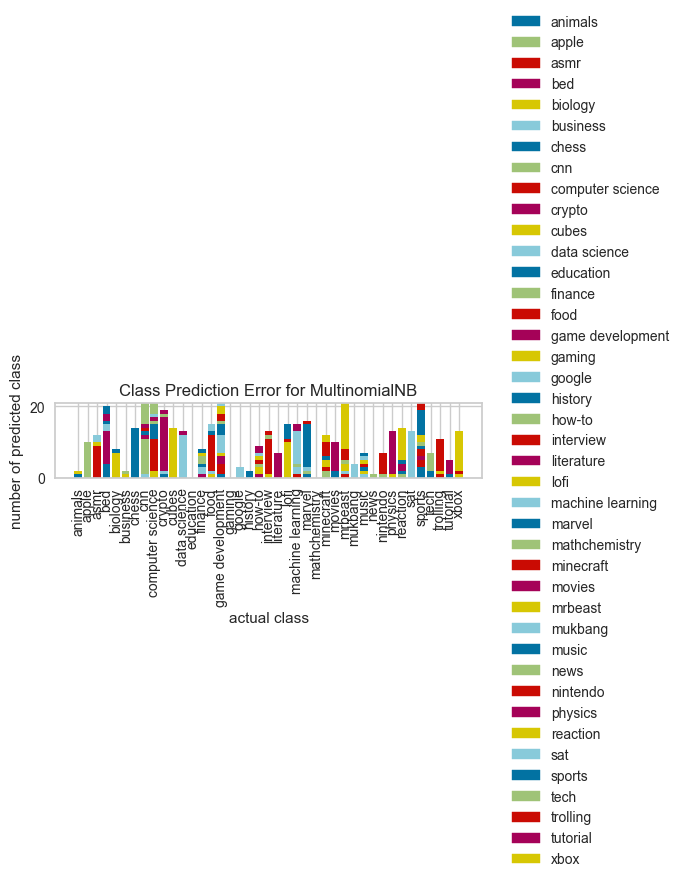

In [84]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    Naive, classes=Encoder.classes_
)

# Fit the training data to the visualizer
visualizer.fit(Train_X_Tfidf,Train_Y)

# Evaluate the model on the test data
visualizer.score(Test_X_Tfidf, Test_Y)

# Draw visualization
g = visualizer.poof()

In [85]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.4, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  68.31501831501832


In [86]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.90      0.75      0.82        12
           2       0.76      0.87      0.81        15
           3       0.50      0.85      0.63        13
           4       0.75      0.43      0.55        14
           5       0.50      0.36      0.42        14
           6       0.93      0.76      0.84        17
           7       0.53      0.83      0.65        12
           8       0.78      0.64      0.70        11
           9       0.92      0.75      0.83        16
          10       1.00      0.88      0.93        16
          11       1.00      0.81      0.90        16
          12       1.00      0.62      0.77         8
          13       0.36      0.57      0.44         7
          14       0.69      0.60      0.64        15
          15       0.67      0.89      0.76         9
          16       0.15      0.13      0.14        15
          17       0.83    

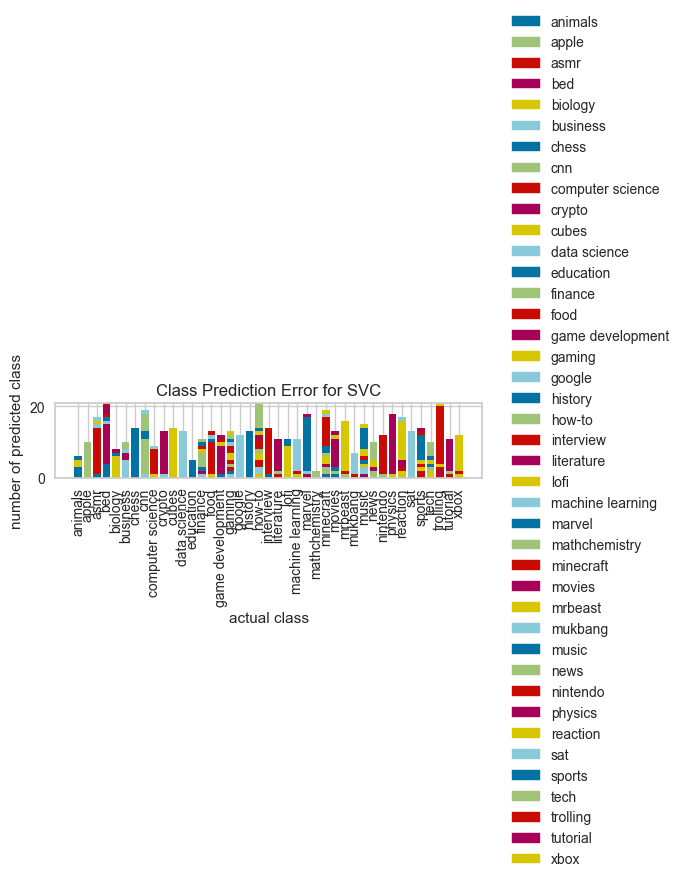

In [87]:
# Instantiate the classification model and visualizer
visualizer2 = ClassPredictionError(
    SVM, classes=Encoder.classes_
)

# Fit the training data to the visualizer
visualizer2.fit(Train_X_Tfidf,Train_Y)

# Evaluate the model on the test data
visualizer2.score(Test_X_Tfidf, Test_Y)

# Draw visualization
g2 = visualizer2.poof()